# Naive Bayes'

### Import Libraries

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

### Loading and Data Analysis

In [3]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
px.histogram(data_frame=df, x='diagnosis', color='diagnosis',color_discrete_sequence=['black','red'])

In [8]:
px.histogram(data_frame=df,x='area_mean',color='diagnosis',color_discrete_sequence=['black','red'])

In [9]:
px.histogram(data_frame=df,x='radius_mean',color='diagnosis',color_discrete_sequence=['black','red'])

In [10]:
px.histogram(data_frame=df,x='perimeter_mean',color='diagnosis',color_discrete_sequence=['black','red'])

In [11]:
px.histogram(data_frame=df,x='smoothness_mean',color='diagnosis',color_discrete_sequence=['black','red'])

In [12]:
px.histogram(data_frame=df,x='texture_mean',color='diagnosis',color_discrete_sequence=['black','red'])

In [13]:
px.scatter(data_frame=df,x='symmetry_worst',color='diagnosis',color_discrete_sequence=['black','red'])

In [14]:
px.scatter(data_frame=df,x='concavity_worst',color='diagnosis',color_discrete_sequence=['black','red'])

In [15]:
px.scatter(data_frame=df,x='fractal_dimension_worst',color='diagnosis',color_discrete_sequence=['black','red'])

### Data Preprcessing

In [16]:
df.drop('id', axis=1, inplace=True)

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [20]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) # Malignant = 1, Benign = 0

In [21]:
corr = df.corr()

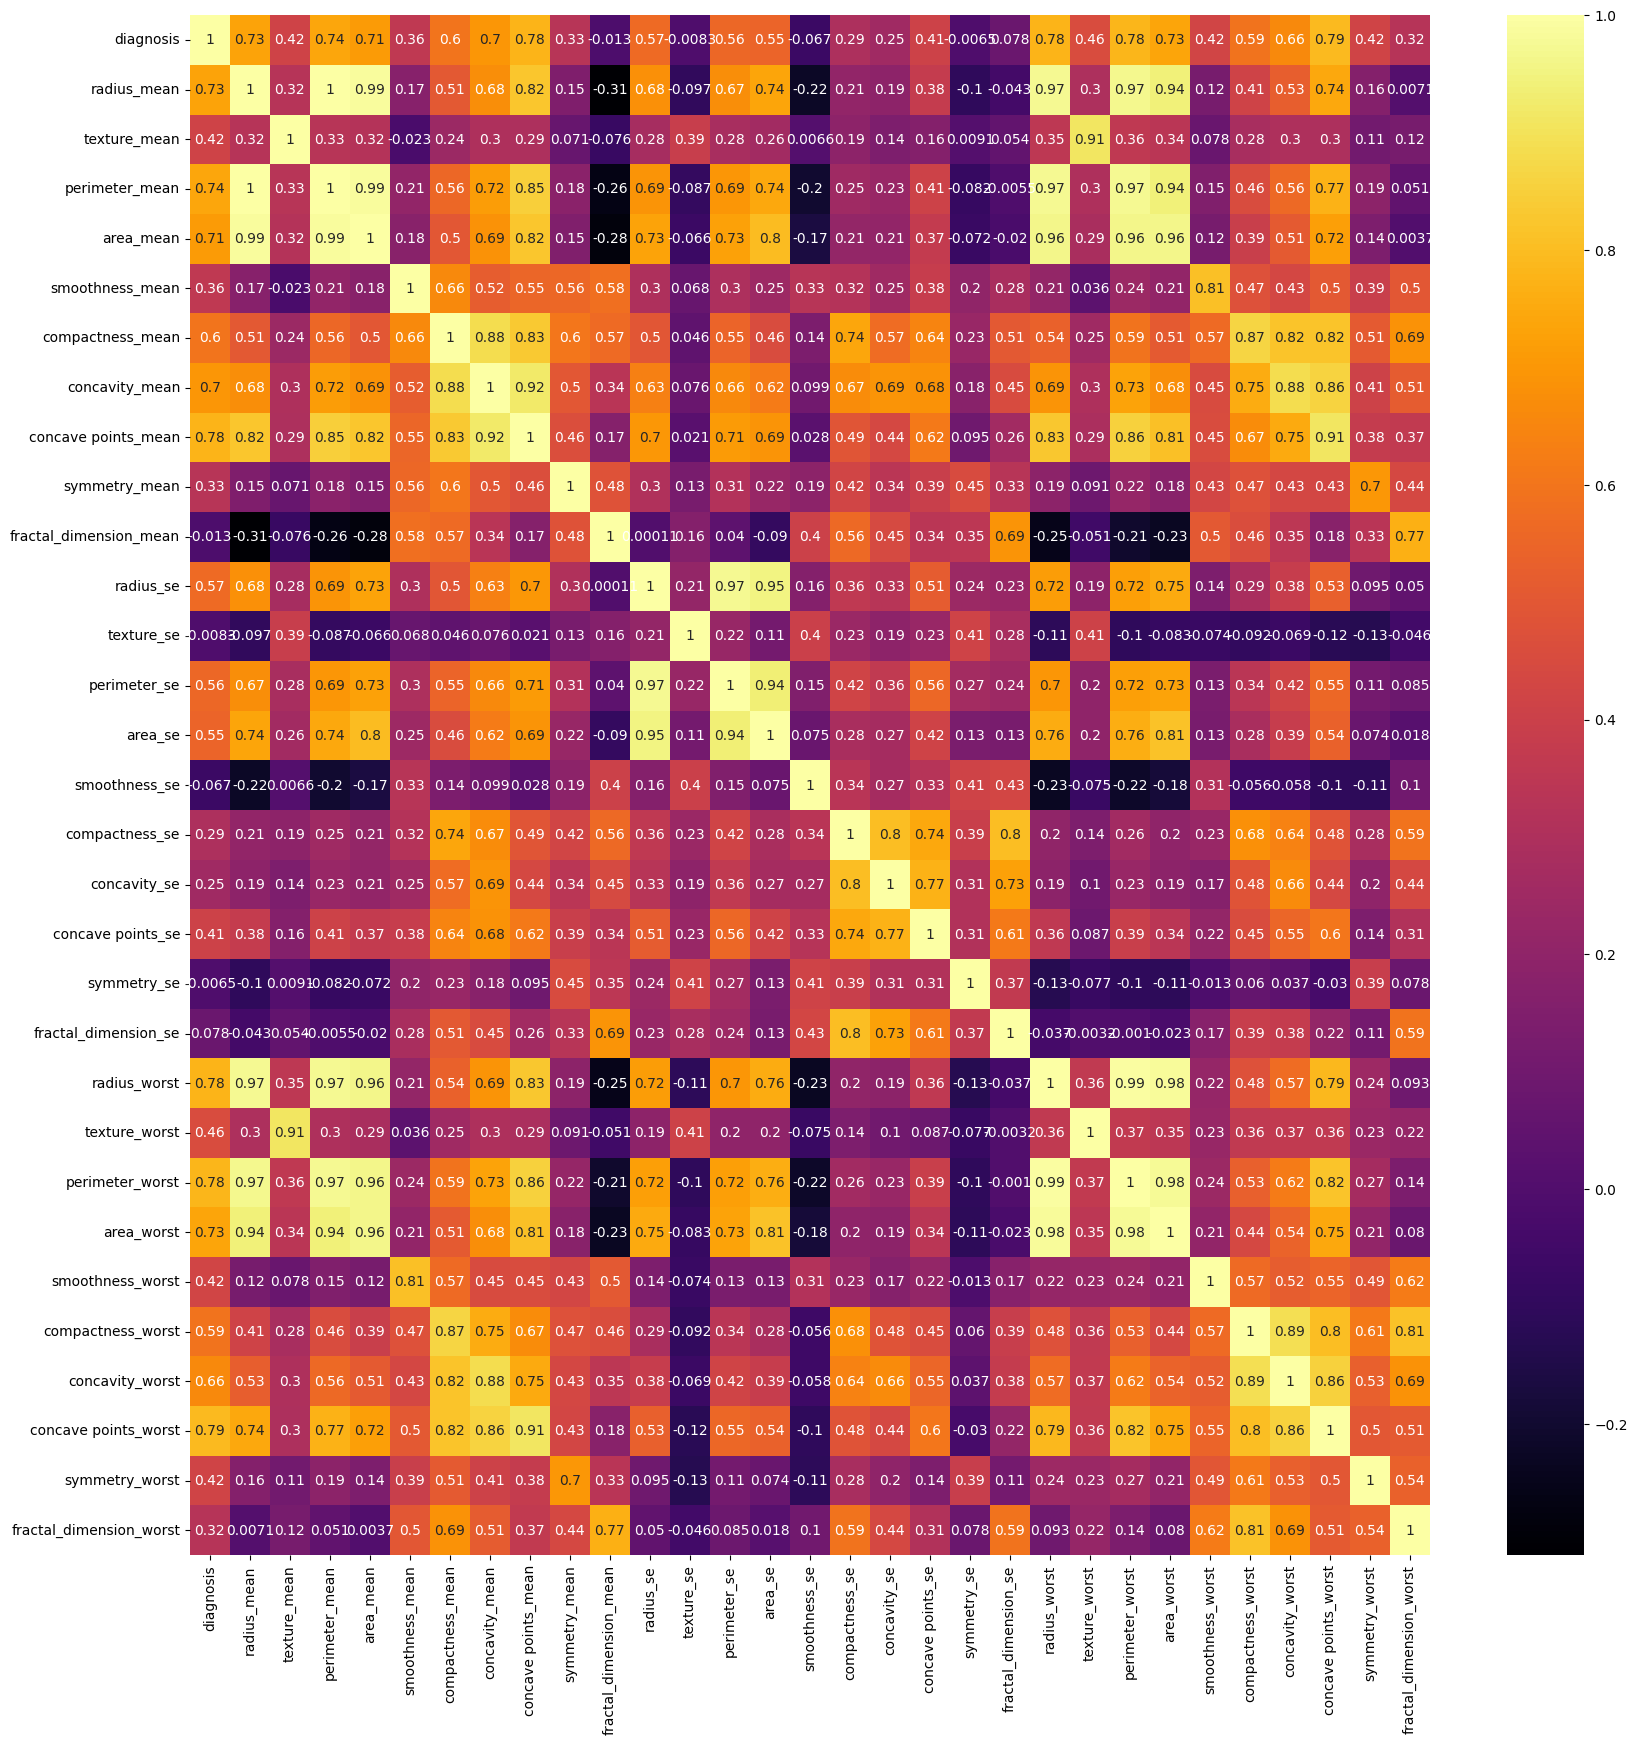

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='inferno',annot=True)
plt.show()

In [26]:
# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.items()]

# Drop the target variable from the results
names.remove('diagnosis')

# Display the results
print(names)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [27]:
X = df[names].values
y = df['diagnosis']

In [28]:
def scale(X):
    """
    Standardizes the data in the array X.

    Parameters:
        X (numpy.ndarray): Features array of shape (n_samples, n_features).

    Returns:
        numpy.ndarray: The standardized features array.
    """
    # Calculate the mean and standard deviation of each feature
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    # Standardize the data
    X = (X - mean) / std
    return X

In [29]:
X = scale(X)

In [30]:
def train_test_split(X, y, random_state=41, test_size=0.2):
    """
    Splits the data into training and testing sets.

    Parameters:
        X (numpy.ndarray): Features array of shape (n_samples, n_features).
        y (numpy.ndarray): Target array of shape (n_samples,).
        random_state (int): Seed for the random number generator. Default is 42.
        test_size (float): Proportion of samples to include in the test set. Default is 0.2.

    Returns:
        Tuple[numpy.ndarray]: A tuple containing X_train, X_test, y_train, y_test.
    """
    # Get number of samples
    n_samples = X.shape[0]

    # Set the seed for the random number generator
    np.random.seed(random_state)

    # Shuffle the indices
    shuffled_indices = np.random.permutation(np.arange(n_samples))

    # Determine the size of the test set
    test_size = int(n_samples * test_size)

    # Split the indices into test and train
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]

    # Split the features and target arrays into test and train
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #split the  data into traing and validating

In [32]:
class NaiveBayes:
    """
    Naive Bayes classifier implementation using Gaussian distribution assumption.
    """

    def fit(self, X, y):
        """
        Fit the Naive Bayes classifier to the training data.

        Parameters:
        - X (numpy array): Training feature data of shape (n_samples, n_features).
        - y (numpy array): Target labels of shape (n_samples,).

        Returns:
        - None
        """
        # Get the number of samples, number of features respectively
        self.m, self.n = X.shape
        
        # Get the unique elements in y (class labels)
        self.unique_classes = np.unique(y)
        # Get the number of unique classes
        self.n_unique = len(self.unique_classes)
        
        # Create empty arrays to store mean, variance, and priors
        self.mean = np.zeros((self.n_unique, self.n))
        self.variance = np.zeros((self.n_unique, self.n))
        self.priors = np.zeros(self.n_unique)
        
        for i, c in enumerate(self.unique_classes):
            # Get the portion of the data where y is equal to a certain class
            X_c = X[y == c]
            # Calculate the mean for each class and all features
            self.mean[i, :] = np.mean(X_c, axis=0)
            # Calculate the variance for each class and all features
            self.variance[i, :] = np.var(X_c, axis=0)
            # Calculate the priors
            self.priors[i] = X_c.shape[0] / self.m

    def gaussian_density(self, x, c):
        """
        Calculate the Gaussian density function for a given feature vector and class.

        Parameters:
        - x (numpy array): Feature vector of shape (n_features,).
        - c (int): Index of the class.

        Returns:
        - numpy array: Gaussian density values for each feature.
        """
        # Get the mean and the variance for the specified class
        mean = self.mean[c]
        variance = self.variance[c]
        
        # Calculate the Gaussian density function
        const = 1 / np.sqrt(variance * 2 * np.pi)
        proba = np.exp(-0.5 * ((x - mean) ** 2 / variance))
        
        return const * proba

    def get_probability(self, x):
        """
        Calculate the probability of each class given a feature vector.

        Parameters:
        - x (numpy array): Feature vector of shape (n_features,).

        Returns:
        - int: Predicted class label.
        """
        # Create an empty list to store the posteriors
        posteriors = []
        
        for i, c in enumerate(self.unique_classes):
            # Calculate the log of the prior
            prior = np.log(self.priors[i])
            # Calculate the new posterior and append it to the list
            posterior = np.sum(np.log(self.gaussian_density(x, i)))
            posterior = posterior + prior
            posteriors.append(posterior)
            
        # Return the class with the highest class probability
        return self.unique_classes[np.argmax(posteriors)]

    def predict(self, X):
        """
        Predict the class labels for the input feature data.

        Parameters:
        - X (numpy array): Feature data of shape (n_samples, n_features).

        Returns:
        - numpy array: Predicted class labels of shape (n_samples,).
        """
        # Create an empty array to store the predictions
        predictions = []
        
        # Loop over each sample in X
        for x in X:
            # Get the prediction for this sample
            pred = self.get_probability(x)
            # Append the prediction to the predictions list
            predictions.append(pred)
        
        return np.array(predictions)

In [33]:
def accuracy(y_true, y_pred):
    """
    Computes the accuracy of a classification model.

    Parameters:
    ----------
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

    Returns:
    ----------
        float: The accuracy of the model
    """
    total_samples = len(y_true)
    correct_predictions = np.sum(y_true == y_pred)
    return (correct_predictions / total_samples) 

In [34]:
model = NaiveBayes()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy(y_test, predictions)

np.float64(0.9646017699115044)

### Inplement Sklearn 

In [35]:
from sklearn.naive_bayes import GaussianNB


sk_model = GaussianNB()

# Train the model using the training sets
sk_model.fit(X_train,y_train)

#Predict Output
sk_predictions = sk_model.predict(X_test) 

#Get the prediction accuracy
 
accuracy(y_test, sk_predictions)

np.float64(0.9646017699115044)